<a href="https://colab.research.google.com/github/bintangkw/Data-Analytic-Ecommerce-Dataset/blob/main/Artificial_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. Import Library

In [315]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

##2. Preprocessing

In [316]:
df = pd.read_excel('/content/drive/MyDrive/ANALITIK DATA 2/Tubes/Pakistan Largest Ecommerce Dataset.xlsx')
df.head()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
0,211131,complete,2016-01-07,kreations_YI 06-L,1950.0,1,1950.0,100147443,Women's Fashion,\N,...,cod,2016-01-07,NaN,1950,2016,7,2016-7,2016-07-01,FY17,1
1,211133,canceled,2016-01-07,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1,240.0,100147444,Beauty & Grooming,\N,...,cod,2016-01-07,Gross,240,2016,7,2016-7,2016-07-01,FY17,2
2,211134,canceled,2016-01-07,Ego_UP0017-999-MR0,2450.0,1,2450.0,100147445,Women's Fashion,\N,...,cod,2016-01-07,Gross,2450,2016,7,2016-7,2016-07-01,FY17,3
3,211135,complete,2016-01-07,kcc_krone deal,360.0,1,60.0,100147446,Beauty & Grooming,R-FSD-52352,...,cod,2016-01-07,Net,360,2016,7,2016-7,2016-07-01,FY17,4
4,211136,order_refunded,2016-01-07,BK7010400AG,555.0,2,1110.0,100147447,Soghaat,\N,...,cod,2016-01-07,Valid,1110,2016,7,2016-7,2016-07-01,FY17,5


##3. Data Understanding

In [317]:
df.describe()

,item_id,created_at,price,qty_ordered,grand_total,increment_id,discount_amount,Working Date,MV,Year,Month,M-Y,Customer ID
count,349.000000,349,349.000000,349.000000,349.000000,3.490000e+02,349.000000,349,349.000000,349.0,349.0,349,349.000000
mean,211322.171920,2016-01-07 00:00:00,1971.284384,1.111748,2356.792980,1.001476e+08,7.163324,2016-01-07 00:00:00,2053.916905,2016.0,7.0,2016-07-01 00:00:00,47.355301
min,211131.000000,2016-01-07 00:00:00,1.000000,1.000000,0.000000,1.001474e+08,0.000000,2016-01-07 00:00:00,1.000000,2016.0,7.0,2016-07-01 00:00:00,1.000000
25%,211230.000000,2016-01-07 00:00:00,260.000000,1.000000,323.000000,1.001475e+08,0.000000,2016-01-07 00:00:00,288.000000,2016.0,7.0,2016-07-01 00:00:00,33.000000
50%,211322.000000,2016-01-07 00:00:00,360.000000,1.000000,366.000000,1.001476e+08,0.000000,2016-01-07 00:00:00,360.000000,2016.0,7.0,2016-07-01 00:00:00,43.000000
75%,211415.000000,2016-01-07 00:00:00,555.000000,1.000000,1099.000000,1.001476e+08,0.000000,2016-01-07 00:00:00,760.000000,2016.0,7.0,2016-07-01 00:00:00,59.000000
max,211510.000000,2016-01-07 00:00:00,96499.000000,6.000000,96499.000000,1.001477e+08,300.000000,2016-01-07 00:00:00,96499.000000,2016.0,7.0,2016-07-01 00:00:00,107.000000
std,108.891458,NaN,8863.822520,0.532404,9049.218907,7.909405e+01,36.127042,NaN,8935.456510,0.0,0.0,NaN,23.950376


In [318]:
df['status'].value_counts()

,count
status,
complete,230
canceled,50
order_refunded,49
received,13
refund,7


##4. Cleaning Data

In [319]:
df = df.drop(columns=['Working Date'])
df = df.drop(columns=['Customer ID'])
df = df.drop(columns=['created_at'])
df = df.drop(columns=['Customer Since'])
df = df.drop(columns=['M-Y'])
df = df.drop(columns=['item_id'])
df = df.drop(columns=['increment_id'])

In [320]:
df.isnull().sum()

,0
status,0
sku,0
price,0
qty_ordered,0
grand_total,0
category_name_1,0
sales_commission_code,0
discount_amount,0
payment_method,0
BI Status,1


In [321]:
df.dropna()

,status,sku,price,qty_ordered,grand_total,category_name_1,sales_commission_code,discount_amount,payment_method,BI Status,MV,Year,Month,FY
1,canceled,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1,240.0,Beauty & Grooming,\N,0.0,cod,Gross,240,2016,7,FY17
2,canceled,Ego_UP0017-999-MR0,2450.0,1,2450.0,Women's Fashion,\N,0.0,cod,Gross,2450,2016,7,FY17
3,complete,kcc_krone deal,360.0,1,60.0,Beauty & Grooming,R-FSD-52352,300.0,cod,Net,360,2016,7,FY17
4,order_refunded,BK7010400AG,555.0,2,1110.0,Soghaat,\N,0.0,cod,Valid,1110,2016,7,FY17
5,canceled,UK_Namkino All In One 200 Gms,80.0,1,80.0,Soghaat,\N,0.0,cod,Gross,80,2016,7,FY17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,complete,kcc_glamour deal,320.0,1,320.0,Beauty & Grooming,C-ISB-42133,0.0,cod,Net,320,2016,7,FY17
345,order_refunded,MYWALET_MW-002-D-BROWN,512.0,1,512.0,Men's Fashion,\N,0.0,cod,Valid,512,2016,7,FY17
346,complete,kcc_Bakheer Pocket Perfume,120.0,1,360.0,Beauty & Grooming,R-KHW-104406,0.0,cod,Net,120,2016,7,FY17
347,complete,kcc_Oudh Pocket Perfume,120.0,1,360.0,Beauty & Grooming,R-KHW-104406,0.0,cod,Net,120,2016,7,FY17


##5. Eksplorasi Data Analysis (EDA)

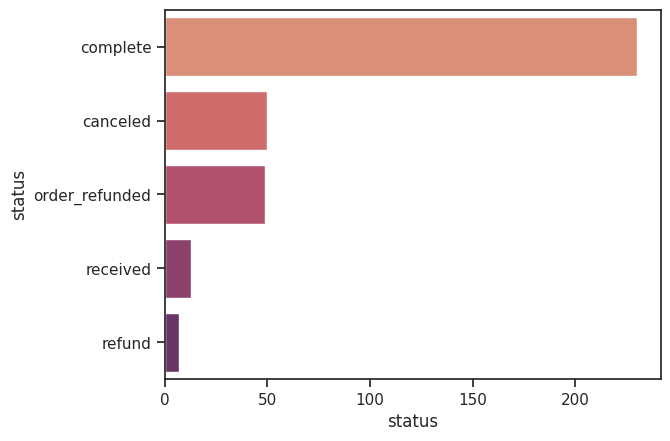

In [322]:
import warnings #menambahkan library warnings
warnings.filterwarnings("ignore")
sns.set_theme(style='ticks') #mengatur tema visualisasi
sns.countplot(y='status', data=df, palette='flare')
plt.xlabel('status')
plt.show()

In [323]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['status'] = label_encoder.fit_transform(df['status'])
df['FY'] = label_encoder.fit_transform(df['FY'])
df.head()

,status,sku,price,qty_ordered,grand_total,category_name_1,sales_commission_code,discount_amount,payment_method,BI Status,MV,Year,Month,FY
0,1,kreations_YI 06-L,1950.0,1,1950.0,Women's Fashion,\N,0.0,cod,NaN,1950,2016,7,0
1,0,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1,240.0,Beauty & Grooming,\N,0.0,cod,Gross,240,2016,7,0
2,0,Ego_UP0017-999-MR0,2450.0,1,2450.0,Women's Fashion,\N,0.0,cod,Gross,2450,2016,7,0
3,1,kcc_krone deal,360.0,1,60.0,Beauty & Grooming,R-FSD-52352,300.0,cod,Net,360,2016,7,0
4,2,BK7010400AG,555.0,2,1110.0,Soghaat,\N,0.0,cod,Valid,1110,2016,7,0


In [324]:
original = label_encoder.classes_
mapping = dict(zip(label_encoder.transform(original), original))
sorted_mapping = dict(sorted(mapping.items()))
print("\nMapping dari label numerik ke nama (yang sudah diurutkan):")
for key, value in sorted_mapping.items():
    print(f"{key}: {value}")


Mapping dari label numerik ke nama (yang sudah diurutkan):
0: FY17


In [325]:
label_encoder = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].astype(str)
    df[column] = label_encoder.fit_transform(df[column])
df

,status,sku,price,qty_ordered,grand_total,category_name_1,sales_commission_code,discount_amount,payment_method,BI Status,MV,Year,Month,FY
0,1,143,1950.0,1,1950.0,12,58,0.0,1,3,1950,2016,7,0
1,0,129,240.0,1,240.0,1,58,0.0,1,0,240,2016,7,0
2,0,22,2450.0,1,2450.0,12,58,0.0,1,0,2450,2016,7,0
3,1,138,360.0,1,60.0,1,45,300.0,1,1,360,2016,7,0
4,2,12,555.0,2,1110.0,10,58,0.0,1,2,1110,2016,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,1,137,320.0,1,320.0,1,18,0.0,1,1,320,2016,7,0
345,2,50,512.0,1,512.0,7,58,0.0,1,2,512,2016,7,0
346,1,127,120.0,1,360.0,1,51,0.0,1,1,120,2016,7,0
347,1,132,120.0,1,360.0,1,51,0.0,1,1,120,2016,7,0


In [326]:
import sklearn.model_selection as ms
x = df[['sku','price','qty_ordered','grand_total','category_name_1','sales_commission_code','discount_amount','payment_method','BI Status',' MV ','Year','Month','FY']]
y = df['status']
X_train, X_test, y_train, y_test = ms.train_test_split(x, y, test_size=0.3, random_state=30)

In [327]:
print("Feature matrix:", X_train.shape)
print("Target matrix:", X_test.shape)
print("Feature matrix:", y_train.shape)
print("Target matrix:", y_test.shape)

Feature matrix: (244, 13)
Target matrix: (105, 13)
Feature matrix: (244,)
Target matrix: (105,)


##7. Modeling (Decision tree)

In [328]:
!pip install tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [329]:
model = Sequential([
    # dense layer 1
    Dense(256, input_dim=13, activation='sigmoid'),

    # dense layer 2
    Dense(128, activation='sigmoid'),

    # output layer
    Dense(5, activation='softmax')
    ])

In [330]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [331]:
history = model.fit(X_train, y_train,
          epochs=50,
          batch_size=64,
          validation_split=0.2)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step - accuracy: 0.4302 - loss: 1.3541 - val_accuracy: 0.6122 - val_loss: 1.0926
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.6381 - loss: 1.0504 - val_accuracy: 0.6122 - val_loss: 1.0172
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.6464 - loss: 0.9913 - val_accuracy: 0.6122 - val_loss: 0.9903
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.6474 - loss: 0.9832 - val_accuracy: 0.6122 - val_loss: 0.9791
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.6713 - loss: 0.9942 - val_accuracy: 0.6122 - val_loss: 0.9980
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.6787 - loss: 0.8964 - val_accuracy: 0.6327 - val_loss: 1.0276
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.6619 - loss: 0.9568 - val_accuracy: 0.6327 - val_loss: 1.0120
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.6646 - loss: 0.9107 - val_accuracy: 0.6122 - val_loss: 0.9919

In [332]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
epochs = list(range(1, len(history.history['accuracy']) + 1))
fig = make_subplots(rows=1, cols=2, subplot_titles=["Akurasi", "Loss"])

# Akurasi
fig.add_trace(go.Scatter(y=history.history['accuracy'], x=epochs, name='Train', line_color='blue'), row=1, col=1)
fig.add_trace(go.Scatter(y=history.history['val_accuracy'], x=epochs, name='Val', line_color='orange'), row=1, col=1)

# Loss
fig.add_trace(go.Scatter(y=history.history['loss'], x=epochs, name='Train', line_color='green'), row=1, col=2)
fig.add_trace(go.Scatter(y=history.history['val_loss'], x=epochs, name='Val', line_color='red'), row=1, col=2)

# Layout
fig.update_layout(title="Performa Model per Epoch", width=900, height=400)
fig.update_xaxes(title_text="Epoch", row=1, col=1)
fig.update_yaxes(title_text="Akurasi", row=1, col=1)
fig.update_xaxes(title_text="Epoch", row=1, col=2)
fig.update_yaxes(title_text="Loss", row=1, col=2)

fig.show()

In [333]:
# Mengevaluasi performa model pada data uji
results = model.evaluate(X_test, y_test, verbose=0)
print('test loss, test acc:', results)

test loss, test acc: [0.8649293184280396, 0.6952381134033203]


In [334]:
df

,status,sku,price,qty_ordered,grand_total,category_name_1,sales_commission_code,discount_amount,payment_method,BI Status,MV,Year,Month,FY
0,1,143,1950.0,1,1950.0,12,58,0.0,1,3,1950,2016,7,0
1,0,129,240.0,1,240.0,1,58,0.0,1,0,240,2016,7,0
2,0,22,2450.0,1,2450.0,12,58,0.0,1,0,2450,2016,7,0
3,1,138,360.0,1,60.0,1,45,300.0,1,1,360,2016,7,0
4,2,12,555.0,2,1110.0,10,58,0.0,1,2,1110,2016,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,1,137,320.0,1,320.0,1,18,0.0,1,1,320,2016,7,0
345,2,50,512.0,1,512.0,7,58,0.0,1,2,512,2016,7,0
346,1,127,120.0,1,360.0,1,51,0.0,1,1,120,2016,7,0
347,1,132,120.0,1,360.0,1,51,0.0,1,1,120,2016,7,0


In [335]:
new_data = pd.DataFrame({
    'sku' : [131],
    'price': [500],
    'qty_ordered': [2],
    'grand_total': [370],
    'category_name_1': [7],
    'sales_commission_code': [0],
    'discount_amount': [58],
    'payment_method': [1],
    'BI Status' : [0],
    ' MV ' : [300],
    'Year': [2016],
    'Month': [7],
    'FY': [0]
})
# Melakukan prediksi
predictions = model.predict(new_data)

# Menampilkan hasil prediksi (probabilitas tiap kelas)
print("Probabilitas untuk setiap kelas:", predictions)

# Menentukan kelas dengan probabilitas tertinggi
predicted_class = np.argmax(predictions)
print("Kelas yang diprediksi:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
Probabilitas untuk setiap kelas: [[0.05647447 0.71210116 0.1420927  0.05690164 0.03243   ]]
Kelas yang diprediksi: 1


In [336]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

In [337]:
y_prob_ann = model.predict(X_test)
y_pred_ann = np.argmax(y_prob_ann, axis=1)
print("ANN:")
print(classification_report(y_test, y_pred_ann))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
ANN:
              precision    recall  f1-score   support

           0       0.70      0.54      0.61        13
           1       0.75      0.86      0.80        72
           2       0.33      0.31      0.32        13
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         1

    accuracy                           0.70       105
   macro avg       0.36      0.34      0.35       105
weighted avg       0.64      0.70      0.66       105

